## What is machine learning?

### Three types of Machine Learning

There are three distinct problems within the Machine Learning field.

Unsupervised learning - Where we only have an input and try to model the distribution in order to better understand the underlying structure of it. E.g. we have census data and try to split segment people into different unknown categories

Reinforcement Learning - We have an agent in an evironment and it has to learn what actions to take to maximize the reward. E.g. we are trying to get an algorithm to learn how to win at tic-tac-toe autonomously

**Supervised Learning**- Where we create to model that can predict an output from a input, given examples of input-output pairs. E.g. we take as input different features about a house such as location, number of rooms, etc and try to predict the price. 

This is the paradigm we will be implementing in this notebook.


Inputs and outputs can take different forms.<br>
Other examples of supervised learning include:

- Taking in an image as input and outputting the probability that there is a car in the image
- Taking in a sequence of words and outputting a probability distribution over the next word


Common synonyms
- Loss, cost, criterion
- Input, Features
- Output, Label

### What does data look like?

![image](images/NN1_xy.JPG)

Lets create a function that generates some artificial data. <br>The function should return any noisy linear data of size *m* which is a parameter of the function. <br>Although data collected in the real world often has much more complex correlations, linear functions are good simple function that we can test our learning algorithms.

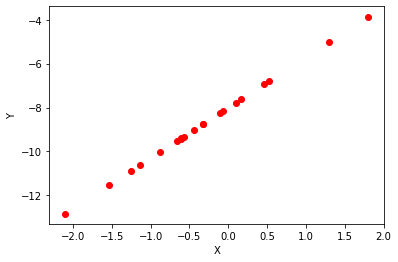

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def sample_linear_data(m=20): 
    ground_truth_w = 2.3 # slope
    ground_truth_b = -8 #intercept
    X = np.random.randn(m)
    Y = ground_truth_w * X + ground_truth_b
    return X, Y #returns X (the input) and Y (labels)

def plot_data(X, Y):
    plt.figure()
    plt.scatter(X, Y, c='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
X, Y = sample_linear_data()
plot_data(X, Y)

### What does a model look like?

Lets create our own model and use it to make a prediction on our data.<br>
We will be using a linear model which has a single weight and bias.<br>
![title](images/NN1_singlevar_lr_equation.JPG)

In [17]:
class LinearHypothesis:
    def __init__(self): #initalize parameters 
        self.w = np.random.randn() #weight
        self.b = np.random.randn() #bias
    def __call__(self, X): #how do we calculate output from an input in our model?
        y_hat = self.w * X + self.b
        return y_hat
    def update_params(self, new_w, new_b):
        self.w = new_w
        self.b = new_b

In [18]:
H = LinearHypothesis()
y_hat = H(X)
print('Input:',X, '\n')
print('W:', H.w, 'B:', H.b, '\n')
print('Prediction:', y_hat, '\n')

Input: [ 0.77823021  0.10681057  0.16109618  1.66670048  0.92637827 -0.67980531
  0.77129068  0.31713318  0.24089453 -0.12142277  1.18606828 -1.41124459
 -0.41374611 -0.7672198  -0.44699236 -0.97318483 -0.40862095 -0.91310626
  0.60880015 -0.31649565] 

W: -0.6112119965174332 B: -0.5144616135796598 

Prediction: [-0.99012526 -0.57974552 -0.61292553 -1.53316894 -1.08067513 -0.09895645
 -0.98588373 -0.70829722 -0.66169924 -0.44024656 -1.23940077  0.34810801
 -0.26157503 -0.04552766 -0.24125452  0.08036063 -0.26470759  0.04363989
 -0.88656757 -0.32101568] 



#### Lets visualise our hypothesis vs the labels

In [19]:
def plot_h_vs_y(X, y_hat, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.scatter(X, y_hat, c='b', label='Hypothesis', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

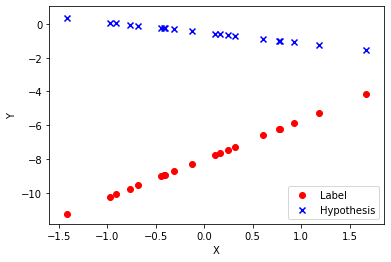

In [20]:
plot_h_vs_y(X, y_hat, Y)

### How do we know how good our model is?

Lets calculate the cost. In this case we will use mean squared_error.

![title](images/NN1_cost_function.JPG)

Complete the function below to return mean square cost.

In [23]:
def L(y_hat, labels):
    cost = 1 / y_hat.shape[0] * np.sum(np.square(y_hat - labels))
    return cost

In [24]:
cost = L(y_hat, Y)
print(cost)

60.560636458307215


### How can we find the right weight values for our model?

#### Random Search

![title](images/NN1_randomsearch.JPG)

In [31]:
def random_search(n_samples):
    best_weights = None
    best_bias = None
    lowest_cost=100000 #initialize it very high
    for i in range(n_samples):
        H.update_params(np.random.randn(), np.random.randn())
        y_hat = H(X)
        cost = L(y_hat, Y)
        if cost < lowest_cost:
            best_weights = H.w
            best_bias = H.b
            lowest_cost = cost
        
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weights, 'and bias of', best_bias)
    return lowest_cost, best_weights, best_bias

Lowest cost of 35.26443417402274 achieved with weight of 2.219533149144085 and bias of -2.0874144966801387


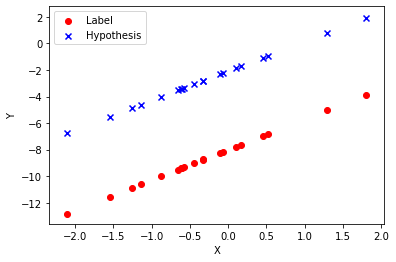

In [37]:
lowest_cost, best_weights, best_bias = random_search(1000)
H.update_params(best_weights, best_bias)
plot_h_vs_y(X, H(X), Y)

#### Grid Search
![title](images/NN1_gridsearch.JPG)

In [45]:
from itertools import permutations
def generate_grid_search_values(n_params, n_samples=100, minval=-2.5, maxval=2.5):
    grid_samples = [[]]
    vals = np.full(n_params, minval)

    n_samples = np.power(n_samples, 1/n_params).round()
    param_values = np.linspace(minval, maxval, n_samples)
    grid_samples = permutations(param_values, n_params)
        
    return grid_samples

def grid_search(grid_search_values):
    best_weights = None
    best_bias = None
    lowest_cost=100000 #initialize it very high
    for search_val in grid_search_values:
        H.update_params(search_val[0], search_val[1])
        y_hat = H(X)
        cost = L(y_hat, Y)
        if cost<lowest_cost:
            lowest_cost=cost
            best_weights = H.w
            best_bias = H.b
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weights, 'and bias of', best_bias)
    return lowest_cost, best_weights, best_bias

Lowest cost of 29.59202053702008 achieved with weight of 2.5 and bias of -2.5


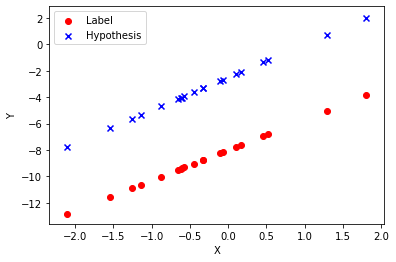

In [46]:
grid_search_values = list(generate_grid_search_values(2, n_samples=1000))
lowest_cost, best_weights, best_bias = grid_search(grid_search_values)
H.update_params(best_weights, best_bias)
plot_h_vs_y(X, H(X), Y)

#### Gradient Descent

Gradient descent is another optimization algorithm that we could use. We can use gradient descent when our model is a differentiable function. Linear functions are pretty simple to differentiate hence why we can use it here.

The algorithm starts by randomly initializing our parameters. We then calculate the cost of those parameters and the derivative of our cost w.r.t each parameter. This tells us the direction of steepest ascent. We update each parameter value by taking a step in the opposite direction, proportional to the learning rate

![title](images/NN1_grad_descent.JPG)

When there is only one parameter, we have a loss curve as shown in the diagrams above. When we have more than one parameter, we have 3d loss surfaces which we perform descent on.

Lets calculate the derivative of the parameters with respect to the loss for the linear function we are using.
![title](images/NN1_single_grad_calc.JPG)

Complete the function below to return the derivative of our loss w.r.t the weight and bias.

In [51]:
class LinearHypothesis:
    def __init__(self): 
        self.w = np.random.randn() #weight
        self.b = np.random.randn() #bias
    def __call__(self, X): 
        y_hat = self.w*X + self.b
        return y_hat
    def update_params(self, new_w, new_b):
        self.w = new_w
        self.b = new_b
    def calc_deriv(self, X, y_hat, labels): #what is the derivative?
        dLdw = 2/y_hat.shape[0] * np.sum((y_hat - labels) * X)
        dLdb = 2/y_hat.shape[0] * np.sum(y_hat - labels)
        return dLdw, dLdb

In [60]:
H = LinearHypothesis()
y_hat = H(X)
dLdw, dLdb = H.calc_deriv(X, y_hat, Y)
print(dLdw, dLdb)

-7.828661721085026 17.465779226034144


Now that we can complete the derivatives, complete the train function below to iteratively improve our parameter estimes to minimize the cost

In [63]:
num_epochs = 200
learning_rate = 0.1
H = LinearHypothesis()

In [68]:
def train(num_epochs, X, Y, H, L, plot_cost_curve=False):
    all_costs = []
    for e in range(num_epochs):
        y_hat = H(X)
        cost = L(y_hat, Y)
        H.w -= learning_rate * H.calc_deriv(X, y_hat, Y)[0]
        H.b -= learning_rate * H.calc_deriv(X, y_hat, Y)[1]
        all_costs.append(cost)
    if plot_cost_curve:
        plt.figure()
        plt.ylabel('Cost')
        plt.xlabel('Epoch')
        plt.plot(all_costs)
    print('Final cost:', cost)
    print('Weight values:', H.w)
    print('Bias values:', H.b)
    return cost, H.w

Final cost: 7.651950780643815e-30
Weight values: 2.3000000000000016
Bias values: -7.999999999999997


(7.651950780643815e-30, 2.3000000000000016)

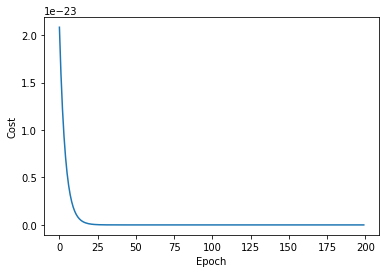

In [69]:
train(num_epochs, X, Y, H, L, plot_cost_curve=True)

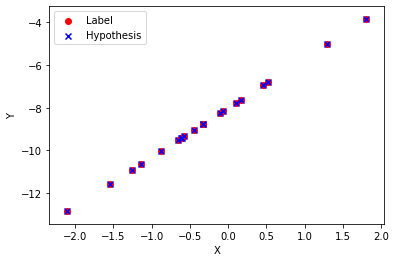

In [70]:
plot_h_vs_y(X, H(X), Y)

### Modelling more advanced functions
Lets try fitting more complex curves than just a straight line.
Complete the function below to return random polynomial data of a given order.

X: [ 0.3740173  -0.53202371 -1.56800407  0.08624154  1.89172481 -2.12883977
 -0.25897203  0.23364905  1.57035528  0.28601478 -0.22060308  0.00886635
  0.20360597 -0.75418739  0.56650826 -0.95783109  1.49221636 -1.01774374
 -1.08888407  0.53202278] 

Y: [  0.54518091   0.71649796   2.62380557   0.85184967 -14.064617
   7.49178657   0.82809781   0.74582545  -8.36567558   0.68360762
   0.84223819   0.87329096   0.77531147   0.69200348   0.06972039
   0.80491152  -7.23942763   0.87329582   0.97953775   0.17416539] 

Ground truth coefficients: [ 0.87448881 -0.12155037 -1.51619735 -1.37128269] 



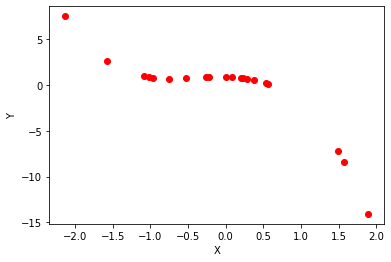

In [79]:
from numpy.polynomial import Polynomial
def sample_polynomial_data(m=20, order=3):
    coeffs = np.random.randn(order + 1)
    X = np.random.randn(m)
    Y = np.vectorize(Polynomial(coeffs))(X)
    return X, Y, coeffs #returns X (the input), Y (labels) and coefficients for each power

m = 20
order=3
X, Y, ground_truth_coeffs = sample_polynomial_data(m, order)
print('X:',X, '\n')
print('Y:',Y, '\n')
print('Ground truth coefficients:', ground_truth_coeffs, '\n')
plot_data(X, Y)

#### Linear fit
As we can see below, our current model lacks the capacity to find a great fit for any polynomial higher than order 1. We call this high bias. To reduce the bias, we need to use a model with higher capacity.

![title](images/NN1_bias.JPG)

Final cost: 5.718398832450449
Weight values: -3.6742341297168477
Bias values: -0.6903973849239465


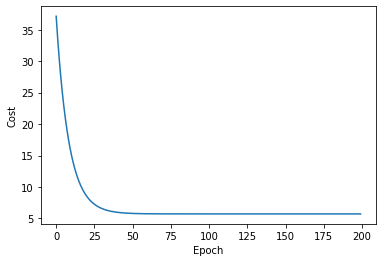

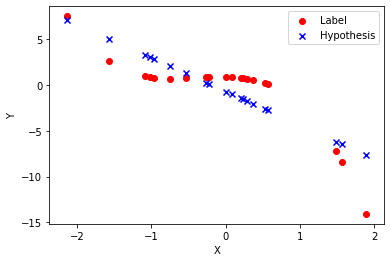

In [80]:
num_epochs = 200
learning_rate = 0.03
H = LinearHypothesis()
train(num_epochs, X, Y, H, L, plot_cost_curve=True)
plot_h_vs_y(X, H(X), Y)

#### Multi-variable Linear regression
Lets change our model to a polynomial one. We can think of this as a specific case of the general multi variable linear regression problem, where we are passing in higher powers of x as extra input features to our model. Multi varible regression is when we have more than one input feature<br>
Our X variable looks like this now since we have multiple input features

![title](images/NN1_multi_x.JPG)

Our weights become a vector as opposed to a single value

![title](images/NN1_weights.JPG)

The weights variable (w) becomes a row vector so we need to transpose it when we multiply it by the X matrix

![title](images/NN1_lr_equation.JPG)

Our gradient calculation changes slightly to account for the fact that we have more weights than one

![title](images/NN1_multi_grad_calc.JPG)

Change the \_\_call\_\_ and calc_deriv functions of the class below so it works for multiple input variables.<br>
Also complete the create_polynomial_data function to return a copy of the original dataset with extra features which are the orginal x feature raised to higher powers.


In [116]:
class MultiVariableLinearHypothesis:
    def __init__(self, n_vars):
        self.n_vars = n_vars
        self.b = np.random.randn()
        self.w = np.random.randn(n_vars)
    def __call__(self, X): #input is of shape (n_datapoints, n_vars)
        y_hat = np.matmul(X, self.w) + self.b
        return y_hat #output is of shape (n_datapoints, 1)
    def update_params(self, new_w, new_b):
        self.w = new_w
        self.b = new_b
    def calc_deriv(self, X, y_hat, labels):
        diffs = y_hat-labels
        dLdw = (2/m)*np.array([np.sum(diffs*X[:,i]) for i in range(self.n_vars)])
        dLdb = 2*np.sum(diffs)/m
        return dLdw, dLdb

def create_polynomial_data(X, order=3):
    new_dataset = np.array([X, *[np.power(X, i) for i in range(2, order + 1)]]).T
    return new_dataset #new_dataset should be shape [m, order]

In [126]:
num_epochs = 200
learning_rate = 0.001
highest_order_power = 4

X_polynomial_augmented = create_polynomial_data(X, highest_order_power)#need normalization to put higher coefficient variables on the same order of magnitude as the others
H = MultiVariableLinearHypothesis(n_vars=highest_order_power)

Final cost: 0.6791535296855508
Weight values: [-0.4796617   0.43663849 -1.32676357 -0.45594331]
Bias values: 0.019076457204201924


(0.6791535296855508,
 array([-0.4796617 ,  0.43663849, -1.32676357, -0.45594331]))

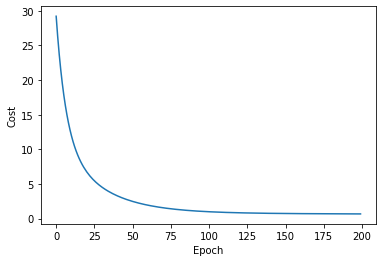

In [127]:
train(num_epochs, X_polynomial_augmented, Y, H, L, plot_cost_curve=True)

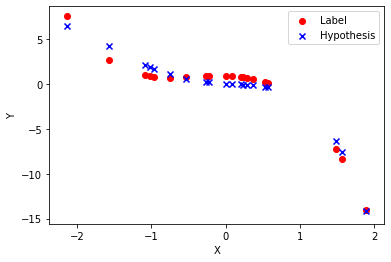

In [128]:
plot_h_vs_y(X, H(X_polynomial_augmented), Y)

### Data Normalization

As we run the train function with higher order polynomial inputs, we often get NaN errors. Lets examine why this happens.

When we square, cube, etc our original feature, the new features will have a much higher mean. Because the derivative of our cost w.r.t a particular weight is proportional to the value of that feature, the derivatives for the weight will be extremely high. This will lead to huge steps along that weight and even higher gradients. This cycle continues until our gradients have exploded to NaN.

In order to solve this problem, we must normalize each of our input features to put them on the same order of magnitude. We do this by subtracting the mean then dividing by the standard deviation.

![title](images/NN1_normalisation.JPG)

Complete the function below which normalizes our dataset along each feature.

In [149]:
def normalize_data(dataset):
    mean = np.mean(dataset, axis=0)
    std = np.std(dataset, axis=0)
    normalized_dataset = (dataset - mean) / std
    return normalized_dataset

In [150]:
num_epochs = 200
learning_rate = 0.01
highest_order_power = 20

X_polynomial_augmented = create_polynomial_data(X, highest_order_power)
X_normalized = normalize_data(X_polynomial_augmented)
H = MultiVariableLinearHypothesis(n_vars=highest_order_power)

Final cost: 0.11395568864039021
Weight values: [-0.66903804 -1.71897148 -1.88303004  0.21490848 -0.88728627 -0.27692026
 -1.28783328 -0.41068699 -1.69715455  1.32546713  0.502773   -1.20757183
  1.33179115  0.35710288 -0.17156203 -1.12580126  0.59981964  0.47244464
 -0.6293513  -0.05858477]
Bias values: -0.43370263921784674


(0.11395568864039021,
 array([-0.66903804, -1.71897148, -1.88303004,  0.21490848, -0.88728627,
        -0.27692026, -1.28783328, -0.41068699, -1.69715455,  1.32546713,
         0.502773  , -1.20757183,  1.33179115,  0.35710288, -0.17156203,
        -1.12580126,  0.59981964,  0.47244464, -0.6293513 , -0.05858477]))

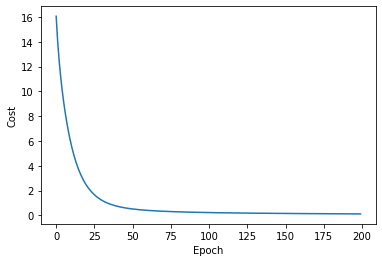

In [151]:
train(num_epochs, X_normalized, Y, H, L, plot_cost_curve=True)

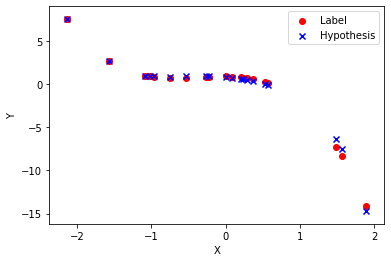

In [152]:
plot_h_vs_y(X, H(X_normalized), Y)

### Testing Generalisation

We build machine learning algorithms to make predictions. So far, we have been testing our algorithm on data points it has already seen but the real measure of success in machine learning is when we can make correct predictions on samples that the algorithm has not seen yet. So lets make a function which will generate us test data by sampling from the same distribution as the training set.

In [ ]:
def sample_more_polynomial_data(coeffs, m_test=20, rng=3):
    poly_func = np.vectorize(Polynomial(coeffs))
    X = np.random.randn(m_test)*rng
    Y = poly_func(X)
    return X, Y#returns X (the input), Y (labels)

m_test = 20
X_test, Y_test = sample_more_polynomial_data(ground_truth_coeffs, m_test)
print('X:',X_test, '\n')
print('Y:',Y_test, '\n')
plot_data(X_test, Y_test)

In [ ]:
X_test_polynomial_augmented = create_polynomial_data(X, highest_order_power)
X_test_normalized = normalize_data(X_polynomial_augmented)
plot_h_vs_y(X, H(X_test_normalized), Y)

### Overfitting - need for regularisation

Sometimes, we have the opposite problem to high bias. That is, our model's capacity is so high that it can easily fit all the points perfectly but can't extrapolate well. This is called high variance. To reduce this, we can either reduce the capacity of our model or introduce regularization.

![title](images/NN1_variance.JPG)

Regulatization is anything that biases our algorithm towards a subset of all possible parameters. In this case, we bias the values towards 0. This encourages the coeffecients of all features 0 if they are not contributing to significantly reducing the cost. In this case, we should see lower values for coefficients of high order features.

![title](images/NN1_regularization.JPG)

Complete the calc_deriv function below to calculate the derivative for our weights with regularization. Use the class property set on intialization called regularization_factor in your calculations.

In [87]:
class MultiVariableLinearHypothesis:
    def __init__(self, n_vars, regularization_factor=0):
        self.regularization_factor = regularization_factor
        self.n_vars = n_vars
        self.b = np.random.randn()
        self.w = np.random.randn(n_vars)
    def __call__(self, X): #input is of shape (n_datapoints, n_vars)
        y_hat = np.matmul(X, self.w) + self.b
        return y_hat #output is of shape (n_datapoints, 1)
    def update_params(self, new_w, new_b):
        self.w = new_w
        self.b = new_b
    def calc_deriv(self, X, y_hat, labels):
        diffs = y_hat-labels
        dLdw = ##
        dLdb = 2*np.sum(diffs)/m
        return dLdw, dLdb

In [119]:
num_epochs = 1000
learning_rate = 0.03
highest_order_power = 20
regularization_factor = 0.1

X_polynomial_augmented = create_polynomial_data(X, highest_order_power)
X_normalized = normalize_data(X_polynomial_augmented)
H = MultiVariableLinearHypothesis(n_vars=highest_order_power, regularization_factor=regularization_factor)

In [ ]:
train(num_epochs, X_normalized, Y, H, L)

In [ ]:
plot_h_vs_y(X, H(X_normalized), Y)

In [ ]:
plot_h_vs_y(X, H(X_test_normalized), Y)